# **MÓDULO 18 - Pratique**

# Introdução

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [81]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

## A) Verifique os tipos de dados.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


Todos os dados seguem o tipo `int64`. Isso já é esperado, para todos, com exceção das variáveis `Valor_Aluguel`, `Valor_Condominio` e `Metragem`, que por se tratar de valores e medição de espaço, geralmente, é utilizado `float64`. A partir deste fato, nota-se um arredondamento de tais variáveis. Isso não afeta a análise, mas julgo relevante identificar que houve arredondamento.

## B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [83]:
df.isnull().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

Sem valores nulos, não é necessário realizar tratamento de substituição e remoção.

# 2 - Realize a segunda etapa de pré-processamento dos dados.

## A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

In [84]:
df.describe().round(1)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.0,7203.0,7203.0,7203.0,7203.0,7203.0,7203.0
mean,2966.6,811.5,88.5,2.3,2.1,1.0,1.4
std,2948.7,796.6,61.6,0.8,1.0,0.9,0.9
min,480.0,0.0,30.0,1.0,1.0,0.0,0.0
25%,1350.0,395.0,52.0,2.0,2.0,1.0,1.0
50%,2000.0,592.0,67.0,2.0,2.0,1.0,1.0
75%,3200.0,980.0,100.0,3.0,2.0,1.0,2.0
max,25000.0,9500.0,880.0,10.0,8.0,5.0,9.0


In [85]:
# IDENTIFICAÇÃO DE OUTLIERS
print("DIFERENÇA DE MÉDIA E MEDIANA")
diff_media_mediana = abs(df.mean() - df.median()).round(1)

diff_media_mediana

DIFERENÇA DE MÉDIA E MEDIANA


Valor_Aluguel       966.6
Valor_Condominio    219.5
Metragem             21.5
N_Quartos             0.3
N_banheiros           0.1
N_Suites              0.0
N_Vagas               0.4
dtype: float64

A partir da diferença entre media/mediana, podemos observar que as variáveis que possuem mais tendência a ter outliers são:
- `Valor_Aluguel`
- `Valor_Condominio`
- `Metragem`

## B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

### Valor_Aluguel

In [86]:
# VALOR_ALUGUEL - Percentual outilers

valor_aluguel_q1 = df['Valor_Aluguel'].quantile(0.25)
valor_aluguel_q3 = df['Valor_Aluguel'].quantile(0.75)
valor_aluguel_iqr = valor_aluguel_q3 - valor_aluguel_q1

valor_aluguel_limetragem_inf = valor_aluguel_q1 - (1.5 * valor_aluguel_iqr)
valor_aluguel_limetragem_sup = valor_aluguel_q3 + (1.5 * valor_aluguel_iqr)

valor_aluguel_outliers = (df['Valor_Aluguel'] < valor_aluguel_limetragem_inf) | (df['Valor_Aluguel'] > valor_aluguel_limetragem_sup)

print("PORCENTAGEM DE OUTLIERS:", round((valor_aluguel_outliers.sum()/df.shape[0])*100,2), "%")


PORCENTAGEM DE OUTLIERS: 10.4 %


In [87]:
fig = px.box(df, y='Valor_Aluguel', title='Boxplot - Valor_Aluguel', labels={'Valor_Aluguel': 'Valores'})
fig.show()

#### Análise 

1. Temos que a porcentagem de outliers é inexpressiva dado o conjunto de dados
2. A partir da análise do boxplot, temos que não há erros de digitação
3. A partir da análise do boxplot, temos que os outliers estão relativamente bem distriobuidos do limite superior até o valor máximo


#### Tratamento
Optou-se por manter e não alterar os dados. Vale ressaltar que: é comum certa valorização nos preços no mercado imobiliário, considerar valores acima da média pode contribuir para uma análise mais realista e alinhada ao comportamento do setor.

### Valor_Condominio

In [88]:
# VALOR_CONDOMINIO - PERCENTUAL DE OUTLIERS

valor_cond_q1 = df['Valor_Condominio'].quantile(0.25)
valor_cond_q3 = df['Valor_Condominio'].quantile(0.75)
valor_cond_iqr = valor_cond_q3 - valor_cond_q1

valor_cond_limetragem_inf = valor_cond_q1 - (1.5 * valor_cond_iqr)
valor_cond_limetragem_sup = valor_cond_q3 + (1.5 * valor_cond_iqr)

valor_cond_outliers = (df['Valor_Condominio'] < valor_cond_limetragem_inf) | (df['Valor_Condominio'] > valor_cond_limetragem_sup)

print("PORCENTAGEM DE OUTLIERS:", round((valor_cond_outliers.sum()/df.shape[0])*100,2), "%")


PORCENTAGEM DE OUTLIERS: 8.14 %


In [89]:
# BOXPLOT - VALOR CONDOMINIO
fig = px.box(df, y='Valor_Condominio', title='Boxplot - Valor_Condominio', labels={'Valor_Condominio': 'Valores'})
fig.show()

In [90]:
# ANÁLISE DE OUTLIERS ACIMA DE 6800

valor_cond_outliers_acima_6800 = df['Valor_Condominio'] >= 6800
prop_outliers_acima_68000 = (valor_cond_outliers_acima_6800.sum() / valor_cond_outliers.sum())*100

print("Proporção de outliers acima de 6800:", round(prop_outliers_acima_68000,2), "%")

Proporção de outliers acima de 6800: 1.37 %


#### Análise

- Notamos uma presença pequena de outliers na variável (<10%);
- Pelo bloxpot, apenas 1.37% dos outliers está acima de 6800

#### Tratamento

Por ter poucos valores acima de R$ 6800, optamos por eliminar esses valores e atualizar o DataFrame

In [91]:
# TRATAMENTO

df = df[df['Valor_Condominio'] < 6800] 

# BOXPLOT - VALOR CONDOMINIO (ATUALIZADO)
fig = px.box(df, y='Valor_Condominio', title='Boxplot - Valor_Condominio (ATUALIZADO)', labels={'Valor_Condominio': 'Valores'})
fig.show()

### Metragem

In [92]:
# METRAGEM - PERCENTUAL DE OUTLIERS

metragem_q1 = df['Metragem'].quantile(0.25)
metragem_q3 = df['Metragem'].quantile(0.75)
metragem_iqr = metragem_q3 - metragem_q1

metragem_lim_inf = metragem_q1 - (1.5 * metragem_iqr)
metragem_lim_sup = metragem_q3 + (1.5 * metragem_iqr)

metragem_outliers = (df['Metragem'] < metragem_lim_inf) | (df['Metragem'] > metragem_lim_sup)

print("PORCENTAGEM DE OUTLIERS:", round((metragem_outliers.sum()/df.shape[0])*100,2), "%")


PORCENTAGEM DE OUTLIERS: 8.88 %


In [93]:
# BOXPLOT - METRAGEM
fig = px.box(df, y='Metragem', title='Boxplot - Metragem', labels={'Metragem': 'Valores'})
fig.show()

In [94]:
# TRATAMENTO
metragem_outliers_acima_420 = (df['Metragem'] > 420)
prop_metragem_outliers_acima_420 = (metragem_outliers_acima_420.sum() / metragem_outliers.sum())*100

# BOXPLOT - VALOR CONDOMINIO
print("Proporção de outliers acima de 420:", round(prop_metragem_outliers_acima_420.sum(),2), "%")

Proporção de outliers acima de 420: 2.03 %


#### Análise
- Assim, como as variáveis anteriores, temos uma presença inexpressiva de outliers
- Analisando o boxplot, temos que a maior parte da amostra está abaixo de 420 m² (97.34%)

#### Tratamento

Eliminamos todos os valores acima de 420m².

In [95]:
# TRATAMENTO
df = df[df['Metragem'] < 420] 

# BOXPLOT - ATUALIZADO
fig = px.box(df, y='Metragem', title='Boxplot - Metragem (ATUALIZADO)', labels={'Metragem': 'Valores'})
fig.show()

### Resultados parciais depois do tratamento de outliers

In [96]:
df.describe().round(1)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7178.0,7178.0,7178.0,7178.0,7178.0,7178.0,7178.0
mean,2929.1,796.1,87.1,2.3,2.1,1.0,1.4
std,2862.1,740.2,56.1,0.8,1.0,0.9,0.8
min,480.0,0.0,30.0,1.0,1.0,0.0,0.0
25%,1350.0,395.0,52.0,2.0,2.0,1.0,1.0
50%,2000.0,590.0,67.0,2.0,2.0,1.0,1.0
75%,3200.0,973.5,100.0,3.0,2.0,1.0,2.0
max,25000.0,6059.0,400.0,10.0,8.0,4.0,9.0


## C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

Levando em consideração nosso objetivo é prever o preço de imóveis, o que implica que o valor do imóvel é a variável mais relevante, realizaremos as seguintes análises bivariadas:
- Metragem x Valor do Condominio
- Metragem x Valor do Aluguel
- Valor do Aluguel x Número de vagas


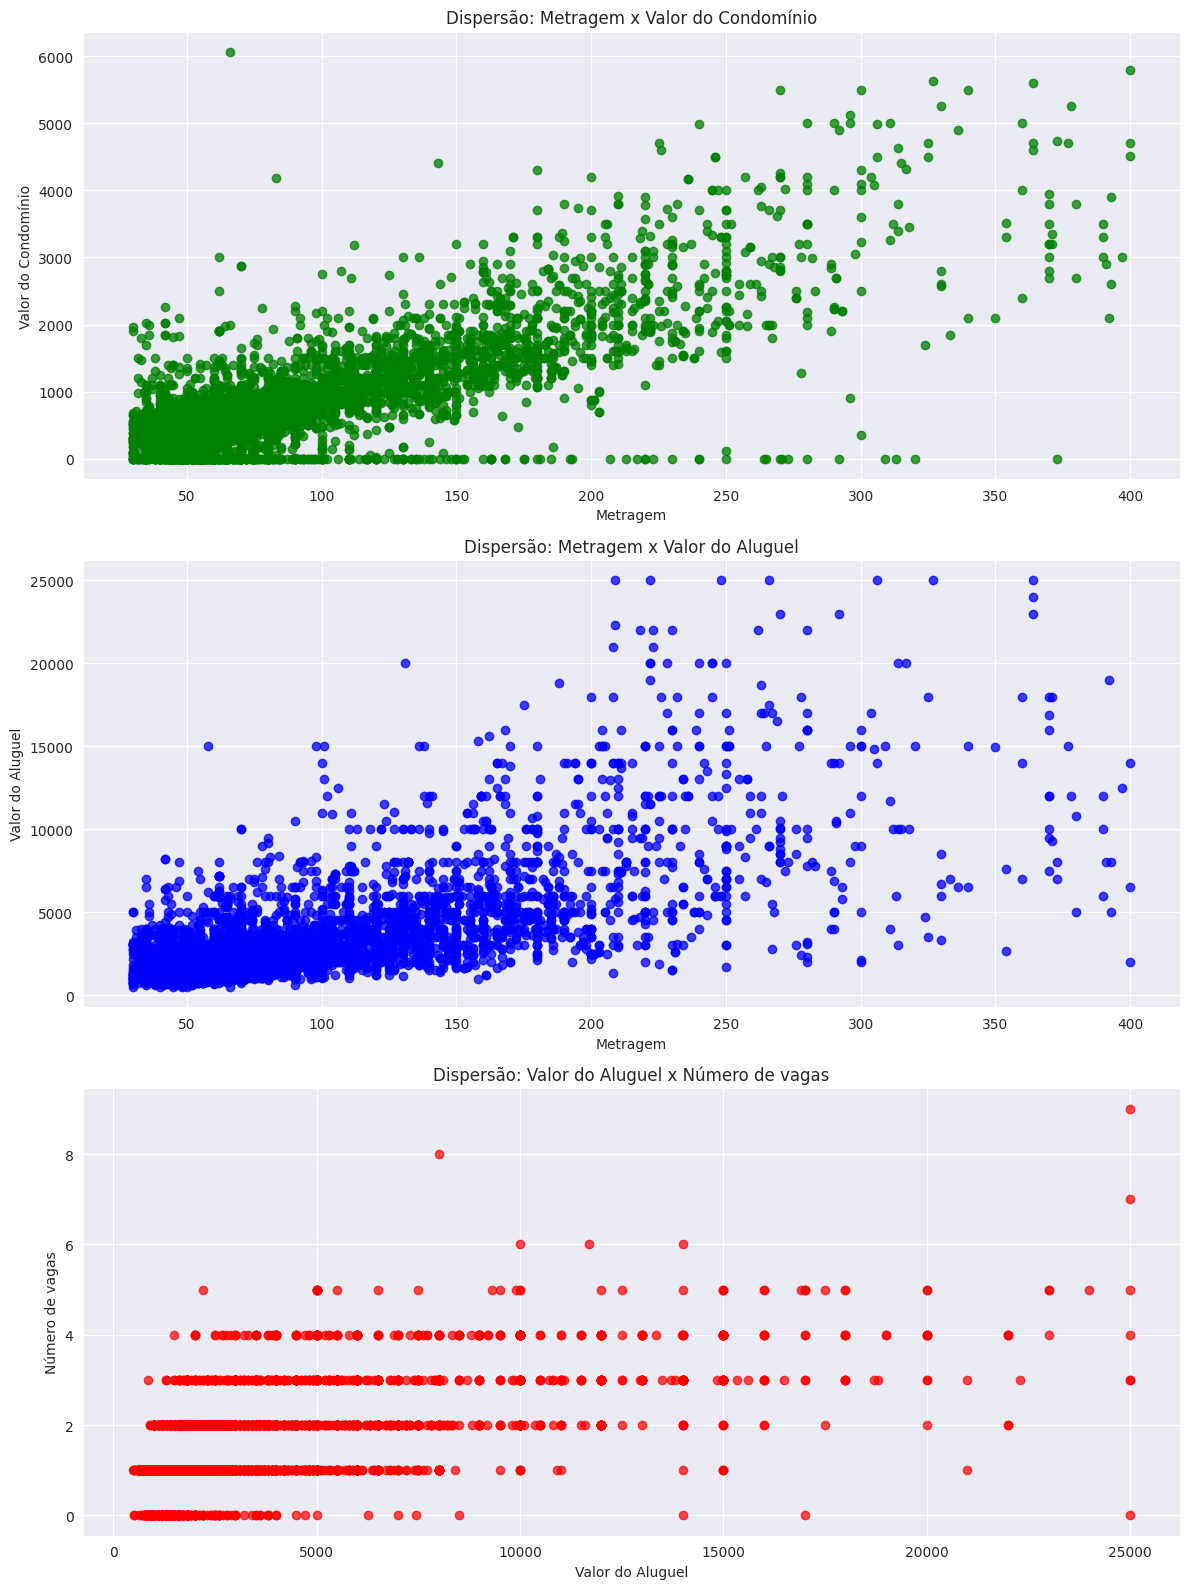

In [97]:
fig, axs = plt.subplots(3, 1, figsize=(12, 16))

# GRÁFICO 1: METRAGEM X VALOR DO CONDOMÍNIO
axs[0].scatter(df['Metragem'], df['Valor_Condominio'], color='green', alpha=0.75)
axs[0].set_xlabel('Metragem')
axs[0].set_ylabel('Valor do Condomínio')
axs[0].set_title('Dispersão: Metragem x Valor do Condomínio')
axs[0].grid(True)

# GRÁFICO 2: METRAGEM X VALOR DO ALUGUEL
axs[1].scatter(df['Metragem'], df['Valor_Aluguel'], color='blue', alpha=0.75)
axs[1].set_xlabel('Metragem')
axs[1].set_ylabel('Valor do Aluguel')
axs[1].set_title('Dispersão: Metragem x Valor do Aluguel')
axs[1].grid(True)

# GRÁFICO 3: VALOR DO ALUGUEL X NÚMERO DE VAGAS
axs[2].scatter(df['Valor_Aluguel'], df['N_Vagas'], color='red', alpha=0.7)
axs[2].set_xlabel('Valor do Aluguel')
axs[2].set_ylabel('Número de vagas')
axs[2].set_title('Dispersão: Valor do Aluguel x Número de vagas')
axs[2].grid(True)

plt.tight_layout()
plt.show()


### Análise

- *Metragem x Valor do Condominio:*
  Observa-se um crescimento quase que linear do valor do condomínio em relação à metragem, i.e., a tendência é que quanto maior a metragem do apartamento, maior é o valor do condomínio.

- *Metragem x Valor do Aluguel:*
  Não se pode dizer que o mesmo ocorre com o valor do aluguel. A partir da análise fo gráfico, podemos inferir que: a maioria dos apartamentos com metragem até 200m², encontram-se na faixa de R$ 10.000 (dez mil reais), na faixa entr 200-350m², temos uma distribuição relativamente uniforme entre os valores de aluguel, entre 2.500-25.000 reais e acima de 350m², não há um padrão reconhecível.

- *Valor do Aluguel x Número de vagas:*
  Observa-se que uma maior quantidade de vagas não implica em um valor de aluguel maior, podemos ver incidência de aluguéis relativamente forte com alguéis relativamente baixos com 3-4 vagas.


# 3 - Realize a terceira etapa de pré processamento dos dados.





## A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.


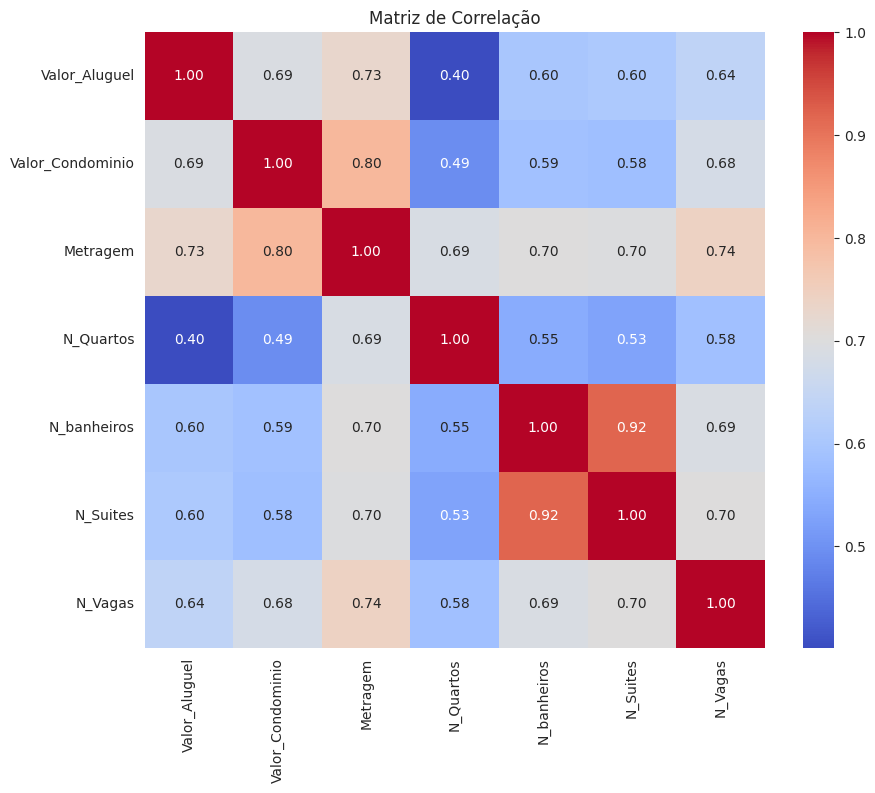

In [98]:
# MATRIZ DE CORRELAÇÃO

correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

In [99]:
df.corr().round(2)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.00,0.69,0.73,0.40,0.60,0.60,0.64
Valor_Condominio,0.69,1.00,0.80,0.49,0.59,0.58,0.68
Metragem,0.73,0.80,1.00,0.69,0.70,0.70,0.74
N_Quartos,0.40,0.49,0.69,1.00,0.55,0.53,0.58
N_banheiros,0.60,0.59,0.70,0.55,1.00,0.92,0.69
N_Suites,0.60,0.58,0.70,0.53,0.92,1.00,0.70
N_Vagas,0.64,0.68,0.74,0.58,0.69,0.70,1.00


## B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

In [100]:
X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# 4 - Treine um modelo de regressão Linear simples


## A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [102]:
X = X_train[['Metragem']]
y = y_train

In [103]:
regressao_metragem = LinearRegression()
regressao_metragem.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [104]:
regressao_metragem.intercept_ # coeficiente angular (a)

np.float64(-324.87983721414093)

In [105]:
regressao_metragem.coef_ # variável independente (b)

array([37.22257756])

Nossa equação seria:  $f(x) = 37{,}327074951x - 303{,}0727392912918$, onde $x$ representa o valor da metragem em metros quadrados

## C) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [106]:
regressao_metragem.score(X,y)

0.5385236896986927

Classificamos o $R$ como razoável. Por não ser próximo de 1, temos que a regressão não retorna valores tão precisos. Ao mesmo tempo, temos que não é próximo de zero a ponto de ser tornar a abordagem como descartável.

Em suma, pode-se dizer que o modelo traz uma ideia preliminar, importante para uma primeira análise, porém não é bom o suficiente para criar um modelo preciso.

## D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

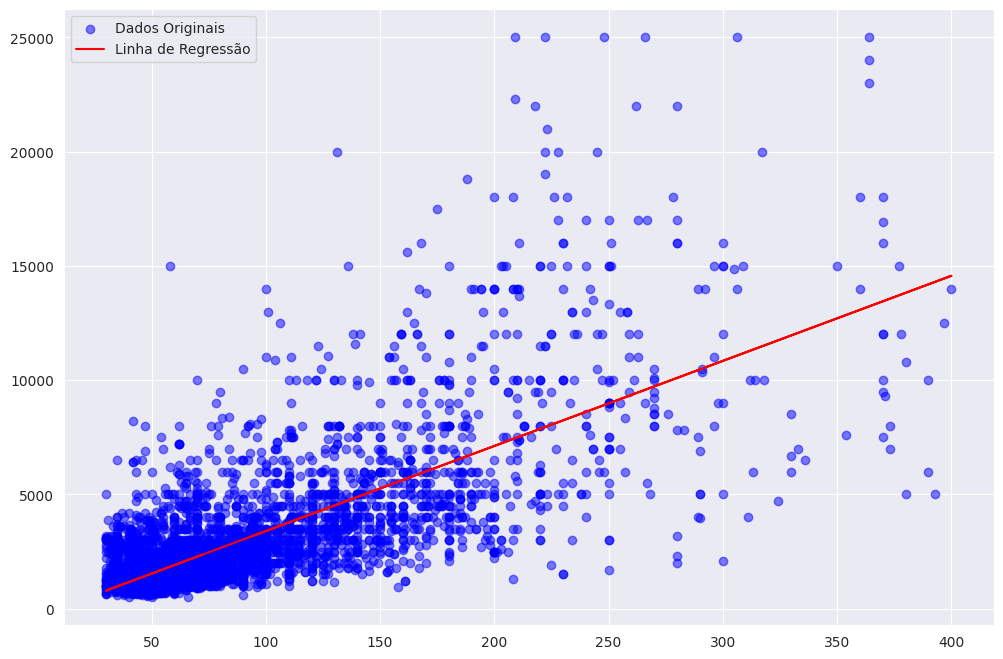

In [107]:
# GRÁFICO - REGRESSÃO LINEAR

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Dados Originais', alpha=0.5)
plt.plot(X, regressao_metragem.predict(X), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

**Análise:**

Graficamente, podemos dividir o gráfico em duas regiões. A primeira, referente a metragem em 0-200. Nesta faixa, podemos analisar um comportamento linear entre a metragem e o valor do aluguel, a partir dessa disposição, nota-se que a linha de regressão segue o corpotamento dos pontos, ou seja, pode ser considerada uma boa previsão.

A segunda faixa, referente à metragem acima de 200, temos que os pontos são mais dispersos no gráfico. A linha de regressão não se ajusta bem para esta região devido à esta natureza.

## E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.

In [108]:
X_test = X_test[['Metragem']]
y_test = y_test

In [109]:
previsoes = regressao_metragem.predict(X_test)
r2 = regressao_metragem.score(X_test, y_test)
print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5049494247001836


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

## F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Assim, como respondido no item C, não podemos classificar o valor de $R^2$ como um bom valor. Ele pode ser utilizado para ter primeira noção do processo, mas ineficaz para análises mais precisas.

# 5 - Aplicação do modelo de regressão linear múltipla!

## A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [110]:
X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [111]:
print(len(X_train), len(X_test))

5383 1795


## B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [112]:
X = sm.add_constant(X_train)
modelo_stats = sm.OLS(y_train, X_train)
resultado_stats = modelo_stats.fit()
print(resultado_stats.summary())

                                 OLS Regression Results                                
Dep. Variable:          Valor_Aluguel   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              3912.
Date:                Wed, 06 Aug 2025   Prob (F-statistic):                        0.00
Time:                        16:11:58   Log-Likelihood:                         -47777.
No. Observations:                5383   AIC:                                  9.557e+04
Df Residuals:                    5377   BIC:                                  9.561e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

## C) Traga o valor do R quadrado e avalie o valor encontrado.

A partir do resultado, temos que: $R^2 = 0.814$. Temos que o valor de $R^2$ é considerado ótimo, ou seja, a regressão multilinear se ajusta bem

## D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.

In [113]:
X = sm.add_constant(X_test)
modelo_stats = sm.OLS(y_test, X_test)
resultado_stats = modelo_stats.fit()
print(resultado_stats.summary())

                                 OLS Regression Results                                
Dep. Variable:          Valor_Aluguel   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              1100.
Date:                Wed, 06 Aug 2025   Prob (F-statistic):                        0.00
Time:                        16:11:58   Log-Likelihood:                         -16194.
No. Observations:                1795   AIC:                                  3.240e+04
Df Residuals:                    1789   BIC:                                  3.243e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

## E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Temos que a abordagem de regressão múltipla apresentou uma melhora considerável em comparação ao modelo de regressão linear, dado os valors de $R^2$ apresentado em cada uma das abordagens, enquanto o modelo linear obteve $R_{linear} = 0.5049$, o modelo multilinear obteve $R_{multi} = 0.787$.

O motivo de isto ter ocorrido é que foram levado vários fatores. Enquanto o modelo linear dependia apenas da correlação entre valor de aluguel e metragem, o modelo multilinear levava em consideração todos os outros fatores.

Observe que ao analisar a matriz de correlação, o valor do aluguel tem uma relação acima de $65\%$ em quase todos, menos o número de quartos. Dada essa correlação alta na maioria dos fatores, o erro tem tendência a diminuir, trazendo um $R$ mais próximo de 1.
